# Wines Points prediction 

Submission Date : 3.6.2023
Task: Predict the wine score given the inputs
Instructions:
 * Use logistic regression as benchmark model
 * Use sklearn pipeliens + cv + grid search with sklearn models (e.g. KNNs, RandomForest, etc.)
 * Compare all models on proper metric (your choice)

For DNN course project:
* Use sklearn pipeliens with tensorflow models (w/wo embeddings, LSTMs, RNNs, Transformers etc.)
* Compare all models on proper metric (your choice)

In [65]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here we will try to predict the points a wine will get based on known characteristics (i.e. features, in the ML terminology). The mine point in this stage is to establish a simple, ideally super cost effective, basline.
In the real world there is a tradeoff between complexity and perforamnce, and the DS job, among others, is to present a tradeoff tables of what performance is achivalbel at what complexity level. 

to which models with increased complexity and resource demands will be compared. Complexity should then be translated into cost. For example:
 * Compute cost 
 * Maintenance cost
 * Serving costs (i.e. is new platform needed?) 
 

## Loading the data

In [66]:
import pandas as pd
import cufflinks as cf; cf.go_offline()

In [67]:
wine_reviews = pd.read_csv("wine_reviews.csv")
wine_reviews = wine_reviews.filter(regex=r'^(?!Unnamed)', axis=1)

wine_reviews.shape

(129908, 18)

In [68]:
wine_reviews.head()

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_len,country1,year,pureTextdescription
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87.0,19.0,Sicily & Sardinia,Etna,Unknown,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,24,Unknown,2013,aromas include tropical fruit broom brimston...
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87.0,15.0,Douro,Unknown,Unknown,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,38,Unknown,2011,this is ripe and fruity a wine that is smooth...
2,2,US,"Tart and snappy, the flavors of lime flesh and...",Unknown,87.0,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,28,Unknown,2013,tart and snappy the flavors of lime flesh and...
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87.0,13.0,Michigan,Lake Michigan Shore,Unknown,Alexander Peartree,Unknown,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,33,Unknown,2013,pineapple rind lemon pith and orange blossom ...
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87.0,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,41,Unknown,2012,much like the regular bottling from this come...


## Data Analysis

#### Data informations

In [69]:
 wine_reviews.describe()

,id,points,price,description_len
count,129908.000000,129908.000000,129908.000000,129908.000000
mean,64984.451889,88.447047,36.207992,40.377998
std,37518.786765,3.040066,45.756596,11.111016
min,0.000000,80.000000,4.000000,3.000000
25%,32491.750000,86.000000,17.000000,33.000000
50%,64985.500000,88.000000,26.000000,39.000000
75%,97475.250000,91.000000,42.000000,47.000000
max,129970.000000,100.000000,3300.000000,135.000000


In [70]:
wine_reviews.describe(include="all")

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_len,country1,year,pureTextdescription
count,129908.000000,129908,129908,129908,129908.000000,129908.000000,129908,129908,129908,129908,129908,129908,129908,129908,129908.000000,129908,129908,129908
unique,NaN,43,119896,37955,NaN,NaN,425,1230,18,20,16,118781,702,16745,NaN,12,59,119896
top,NaN,US,"Gravenstein apple, honeysuckle and jasmine aro...",Unknown,NaN,NaN,California,Unknown,Unknown,Unknown,Unknown,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,Pinot Noir,Wines & Winemakers,NaN,Unknown,2013,gravenstein apple honeysuckle and jasmine aro...
freq,NaN,54504,3,37454,NaN,NaN,36247,21184,79397,26244,31213,11,13269,222,NaN,129480,15865,3
mean,64984.451889,NaN,NaN,NaN,88.447047,36.207992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.377998,NaN,NaN,NaN
std,37518.786765,NaN,NaN,NaN,3.040066,45.756596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.111016,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN
25%,32491.750000,NaN,NaN,NaN,86.000000,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.000000,NaN,NaN,NaN
50%,64985.500000,NaN,NaN,NaN,88.000000,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.000000,NaN,NaN,NaN
75%,97475.250000,NaN,NaN,NaN,91.000000,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.000000,NaN,NaN,NaN


In [71]:
wine_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129908 entries, 0 to 129907
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     129908 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129908 non-null  object 
 3   designation            129908 non-null  object 
 4   points                 129908 non-null  float64
 5   price                  129908 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               129908 non-null  object 
 8   region_2               129908 non-null  object 
 9   taster_name            129908 non-null  object 
 10  taster_twitter_handle  129908 non-null  object 
 11  title                  129908 non-null  object 
 12  variety                129908 non-null  object 
 13  winery                 129908 non-null  object 
 14  description_len        129908 non-nu

In [72]:
wine_reviews[wine_reviews.duplicated()]

,id,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,description_len,country1,year,pureTextdescription


In [73]:
wine_reviews.points.isnull().sum()

0

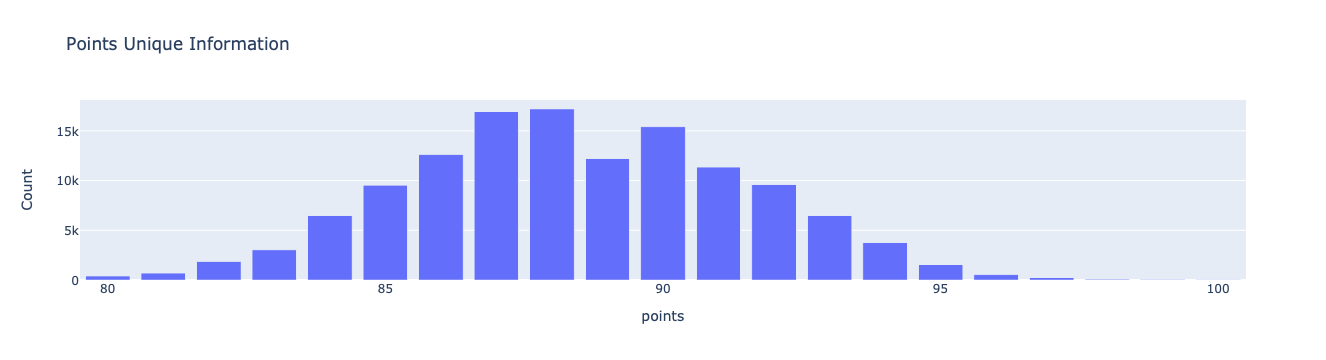

In [74]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Group values and count occurrences
value_counts = wine_reviews['points'].value_counts().sort_index().reset_index()
value_counts.columns = ['points', 'count']

# Plot the grouped values
fig = px.bar(value_counts, x='points', y='count', labels={'point': 'Values', 'count': 'Count'},
             title='Points Unique Information')

# Show the plot
fig.show()
pio.write_image(fig, 'Images/bar_plot.jpg')

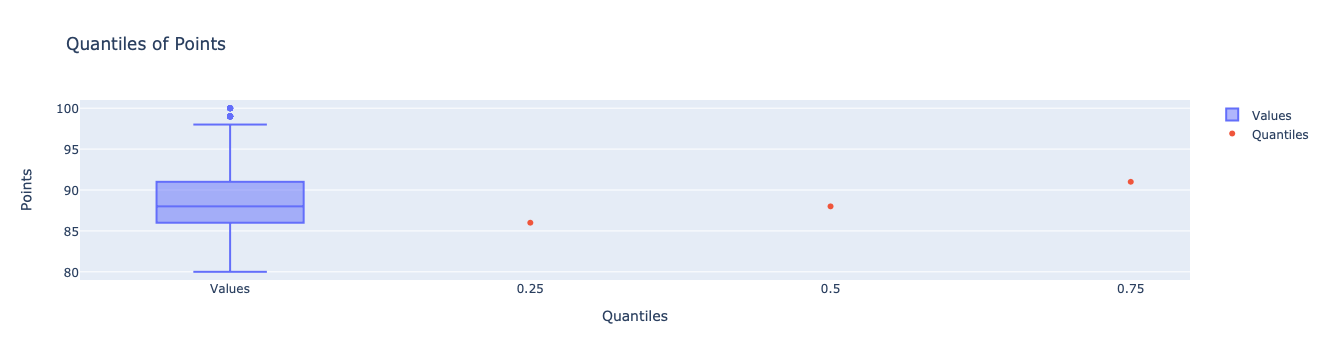

In [75]:
import pandas as pd
import plotly.graph_objects as go

# Calculate the quantiles

quantiles = wine_reviews['points'].quantile([0.25, 0.5, 0.75])

# Plot the quantiles
fig = go.Figure()

# Add a box plot
fig.add_trace(go.Box(y=wine_reviews['points'], name='Values'))

# Add markers for the quantiles
fig.add_trace(go.Scatter(x=quantiles.index, y=quantiles.values,
                         mode='markers', name='Quantiles'))

# Set the y-axis range
fig.update_yaxes(range=[min(wine_reviews['points'])-1, max(wine_reviews['points'])+1])

# Set labels and title
fig.update_layout(xaxis_title='Quantiles', yaxis_title='Points', title='Quantiles of Points')

# Show the plot
fig.show()
pio.write_image(fig, 'Images/prices.jpg')

In [76]:
wine_reviews.price.isnull().sum()

0

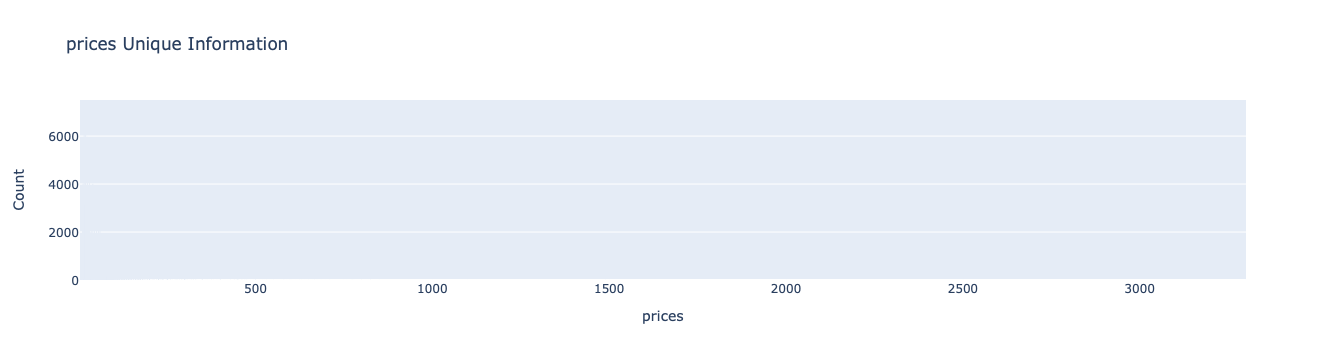

In [77]:
import pandas as pd
import plotly.express as px

# Group values and count occurrences
value_counts = wine_reviews['price'].value_counts().sort_index().reset_index()
value_counts.columns = ['prices', 'count']

# Plot the grouped values
fig = px.bar(value_counts, x='prices', y='count', labels={'price': 'Values', 'count': 'Count'},
             title='prices Unique Information')

fig.update_xaxes(range=[min(value_counts['prices']) - 0.5, max(value_counts['prices'])])

# Show the plot
fig.show()
pio.write_image(fig, 'Images/prices_Unique_Information.jpg')

We can see two thing from this gragh. It is close to the gaussian but not enough. This is mean:
* 𝑆𝑘𝑒𝑤𝑛𝑒𝑠𝑠 - is positive and this is mean this distribution has right tail.
* Kurtosis - one can see a small tail mean a lower kurtosis maybe even negative

##### The reason I checked the price. is that i wanted to understand this is can be bi-directional way for prices and points

we can see the correlation between the price and the points. we can see that the correlation is not bad but not good as one can expect when he buy a expensive wine.

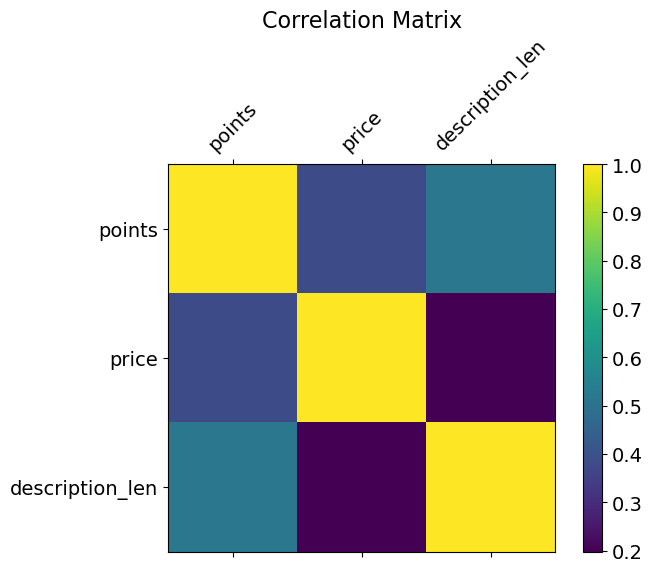

In [78]:
import matplotlib.pyplot as plt


wine_reviews_without_id=wine_reviews.drop(columns='id')

f = plt.figure(figsize=(7, 5))
plt.matshow(wine_reviews_without_id.corr(), fignum=f.number)
plt.xticks(range(wine_reviews_without_id.select_dtypes(['number']).shape[1]), wine_reviews_without_id.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(wine_reviews_without_id.select_dtypes(['number']).shape[1]), wine_reviews_without_id.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Images/Correlation_Matrix.png')


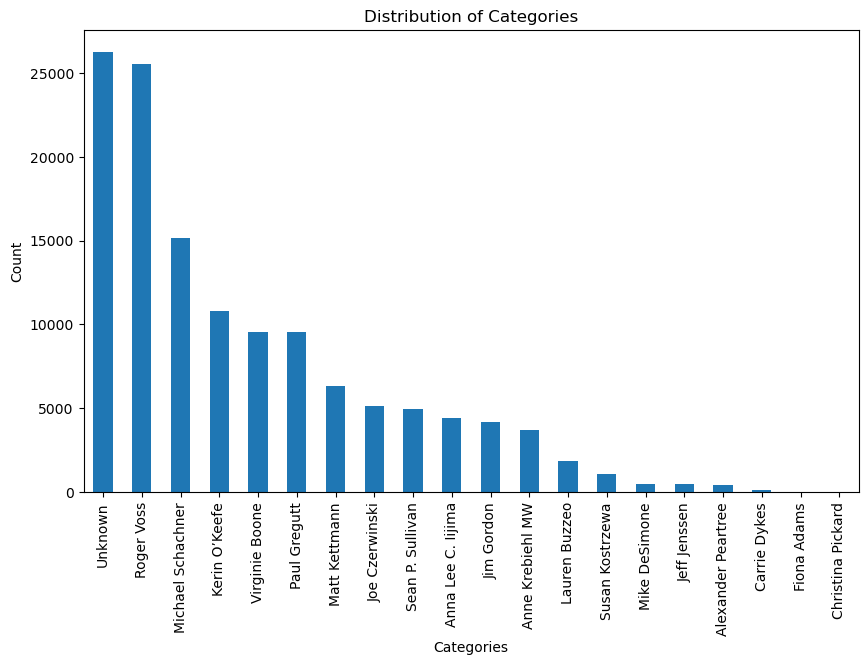

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'df' with a string column 'column_name'
# Replace 'df' and 'column_name' with your actual DataFrame and column name

# Group by the string column and count occurrences
grouped = wine_reviews_without_id.groupby('taster_name').size()

# Sort the groups by count in descending order
sorted_groups = grouped.sort_values(ascending=False)

# Plot the distribution after count
plt.figure(figsize=(10, 6))
sorted_groups.plot(kind='bar')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.show()
plt.savefig('Images/Distribution_of_Categories.png')
plt.close()

[[ 1.         -0.09054417]
 [-0.09054417  1.        ]]


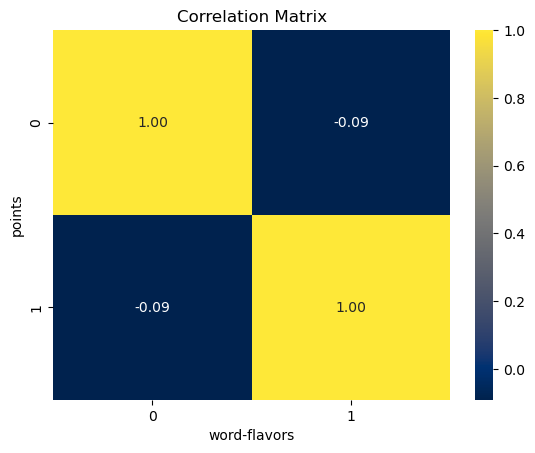

In [83]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['pureTextdescription'].str.contains('flavors', case=False)
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['contains_word'].astype(int)
# Calculate correlation coefficient between two Series
correlation_matrix = np.corrcoef(wine_reviews_without_id['contains_word'], wine_reviews_without_id['points'])
fig, ax = plt.subplots()

print(correlation_matrix)
# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f",ax=ax)

# Set plot title and labels
# Set plot title and labels

ax.set_title('Correlation Matrix')
ax.set_xlabel('word-flavors')
ax.set_ylabel('points')

# Save the plot as an image file
fig.savefig('Images/correlation_matrix_flavors_points.png')


[[1.         0.04329128]
 [0.04329128 1.        ]]


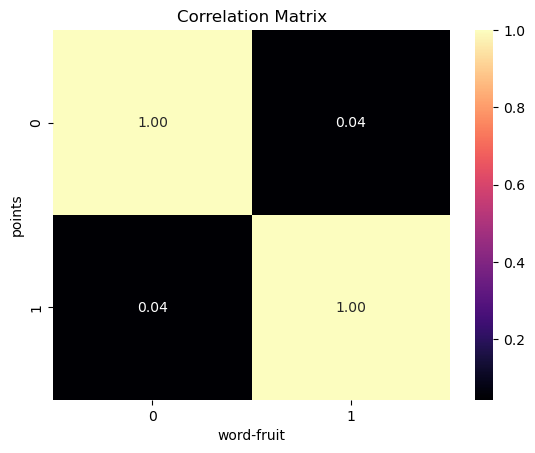

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['pureTextdescription'].str.contains('fruit', case=False)
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['contains_word'].astype(int)
# Calculate correlation coefficient between two Series
correlation_matrix = np.corrcoef(wine_reviews_without_id['contains_word'], wine_reviews_without_id['points'])
print(correlation_matrix)
fig, ax = plt.subplots()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f",ax=ax)

ax.set_title('Correlation Matrix')
ax.set_xlabel('word-fruit')
ax.set_ylabel('points')

# Save the plot as an image file
fig.savefig('Images/correlation_matrix_fruit_points.png')

[[1.         0.01211861]
 [0.01211861 1.        ]]


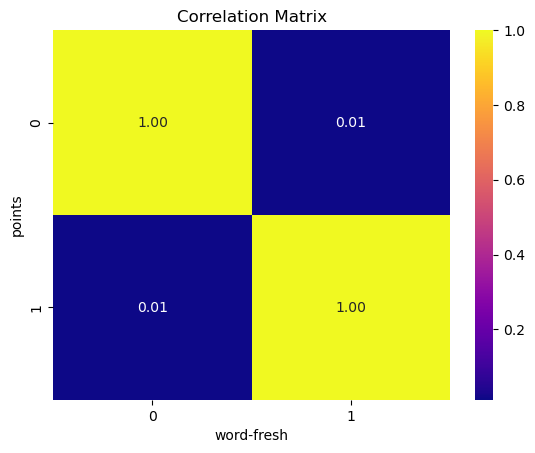

In [89]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['pureTextdescription'].str.contains('fresh', case=False)
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['contains_word'].astype(int)
# Calculate correlation coefficient between two Series
correlation_matrix = np.corrcoef(wine_reviews_without_id['contains_word'], wine_reviews_without_id['points'])
print(correlation_matrix)
fig, ax = plt.subplots()

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='plasma', fmt=".2f")


ax.set_title('Correlation Matrix')
ax.set_xlabel('word-fresh')
ax.set_ylabel('points')


fig.savefig('Images/correlation_matrix_fresh_points.png')

[[1.         0.20539999]
 [0.20539999 1.        ]]


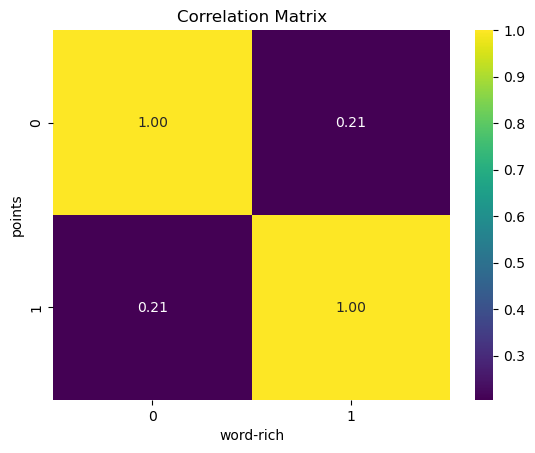

In [88]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['pureTextdescription'].str.contains('rich', case=False)
wine_reviews_without_id['contains_word'] = wine_reviews_without_id['contains_word'].astype(int)
# Calculate correlation coefficient between two Series
correlation_matrix = np.corrcoef(wine_reviews_without_id['contains_word'], wine_reviews_without_id['points'])
print(correlation_matrix)
# Create a heatmap of the correlation matrix
fig, ax = plt.subplots()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")

ax.set_title('Correlation Matrix')
ax.set_xlabel('word-rich')
ax.set_ylabel('points')


fig.savefig('Images/correlation_matrix_rich_points.png')